In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from ultralytics_config import Config
from ultralytics_detect import plot_detection_comparison

In [16]:
nano_results_path = os.path.join('YOLOv8_Models', 'runs', 'yolov8n.pt', Config.METRICS_FILE)
nano_results = pd.read_csv('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/YOLOv8_Models/runs/yolov8n.pt/metrics.csv', index_col=0)

small_results_path = os.path.join('YOLOv8_Models', 'runs', 'yolov8s.pt', Config.METRICS_FILE)
small_results = pd.read_csv('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/YOLOv8_Models/runs/yolov8s.pt/metrics.csv', index_col=0)

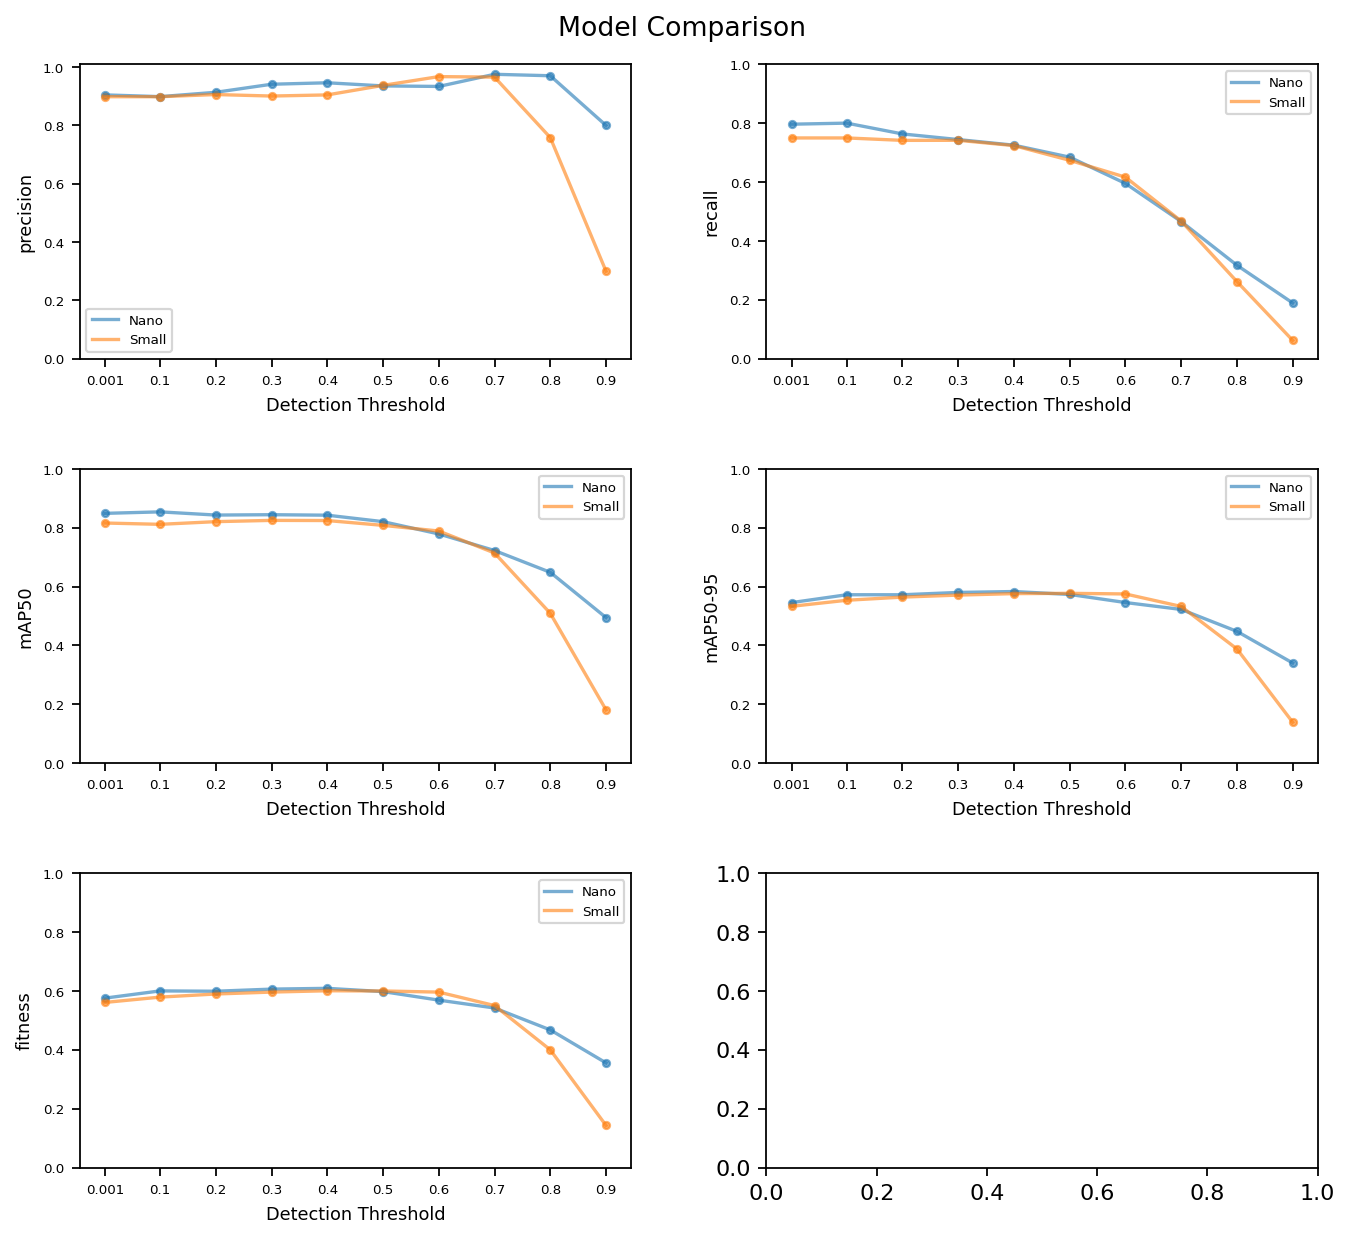

In [66]:
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness']

fig, axes = plt.subplots(3, 2, figsize=(9,8), dpi=160)
fig.tight_layout(pad=3)
axes = axes.flat
fig.suptitle('Model Comparison', fontsize=12)

for i, metric in enumerate(metrics):

    ax = axes[i]

    ax.plot(nano_results.index, nano_results[metric], alpha=0.6, label='Nano')
    ax.scatter(nano_results.index, nano_results[metric], alpha=0.6, s=10)
    ax.plot(small_results.index, small_results[metric], alpha=0.6, label='Small')
    ax.scatter(small_results.index, small_results[metric], alpha=0.6, s=10)

    ax.legend(fontsize=6)

    y_ticks = np.round(np.arange(0,1.1,0.2), 1)
    x_ticks = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    ax.set_yticks(y_ticks, labels=y_ticks, fontsize=6)
    ax.set_xticks(x_ticks, labels=x_ticks, fontsize=6)

    ax.set_xlabel("Detection Threshold", fontsize=8)
    if (i != 4):
        name = metric.split('/')[1].split('(')[0]
        ax.set_ylabel(name, fontsize=8)
    else:
        ax.set_ylabel(metric, fontsize=8)

fig.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/comparison.png')


### YOLO Nano

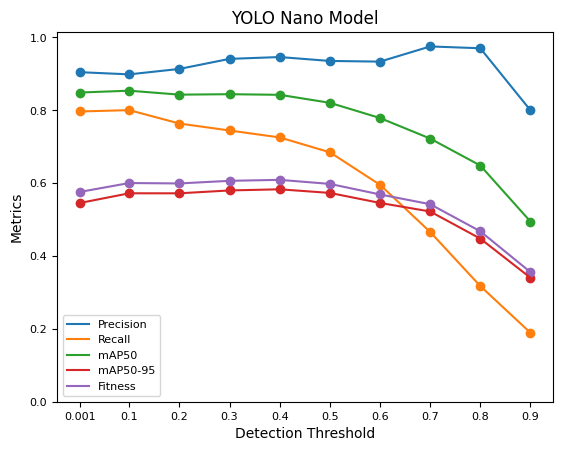

Max precision:  0.975428976273981 ± 0.04974882300608724  en la fila:  7
Recall:  0.5955555555555556 ± 0.21485249411458748
mAP50:  0.7789039285714286 ± 0.11779774867108866
mAP50:  0.5457506174085577 ± 0.07749455607177248
Fitness:  0.5690659485248448 ± 0.08130475180826709


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/YOLOv8_Models/runs/yolov8n.pt/metrics.csv')

# Extrae las columnas relevantes
thresholds = df['threshold']
precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']
mAP50 = df['metrics/mAP50(B)']
mAP50_95 = df['metrics/mAP50-95(B)']
fitness = df['fitness']

# Grafica y guarda Threshold vs Precision
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, mAP50, label='mAP50')
plt.plot(thresholds, mAP50_95, label='mAP50-95')
plt.plot(thresholds, fitness, label='Fitness')

plt.legend(fontsize=8)

plt.scatter(thresholds, precision, label='Precision')
plt.scatter(thresholds, recall, label='Recall')
plt.scatter(thresholds, mAP50, label='mAP50')
plt.scatter(thresholds, mAP50_95, label='mAP50-95')
plt.scatter(thresholds, fitness, label='Fitness')

y_ticks = np.round(np.arange(0,1.1,0.2), 1)
x_ticks = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.yticks(y_ticks, labels=y_ticks, fontsize=8)
plt.xticks(x_ticks, labels=x_ticks, fontsize=8)
plt.xlabel('Detection Threshold')
plt.ylabel('Metrics')
plt.title('YOLO Nano Model')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/metrics_nano.png')
plt.show()

# Obtener Desviacion estandard
precision_std = df['metrics/precision(B)'].std()
recall_std = df['metrics/recall(B)'].std()
mAP50_std = df['metrics/mAP50(B)'].std()
mAP50_95_std = df['metrics/mAP50-95(B)'].std()
fitness_std = df['fitness'].std()

# Imprimir metricas
indice_p = precision == precision.max()
print('Max precision: ', precision.max(), '±', precision_std, ' en la fila: ', indice_p[indice_p == True].index[0])
print('Recall: ', recall[6], '±', recall_std)
print('mAP50: ', mAP50[6], '±', mAP50_std)
print('mAP50: ', mAP50_95[6], '±', mAP50_95_std)
print('Fitness: ', fitness[6], '±', fitness_std)

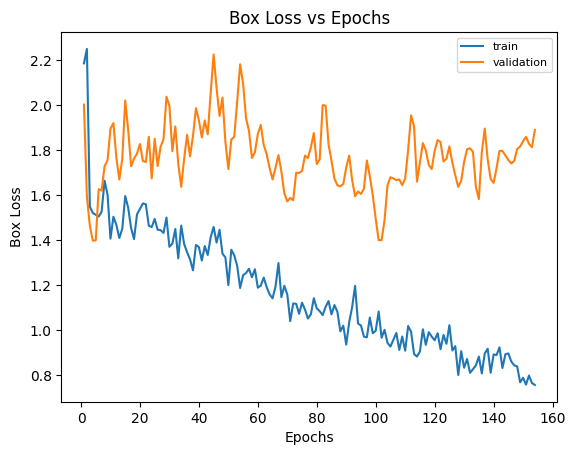

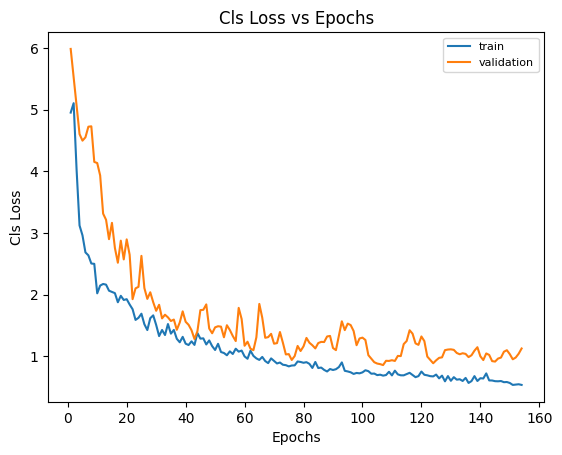

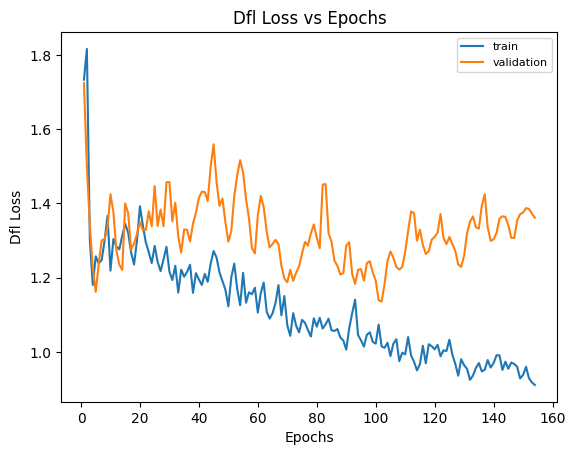

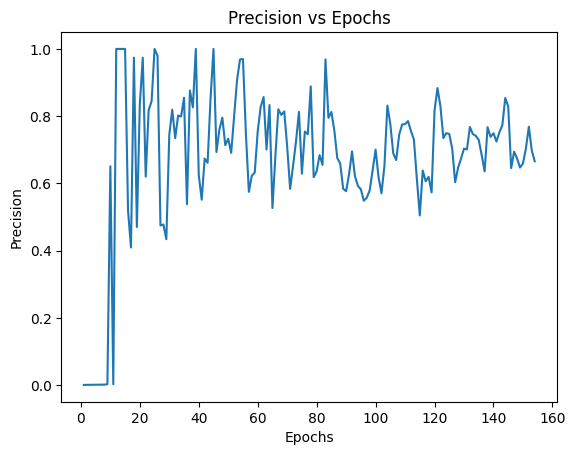

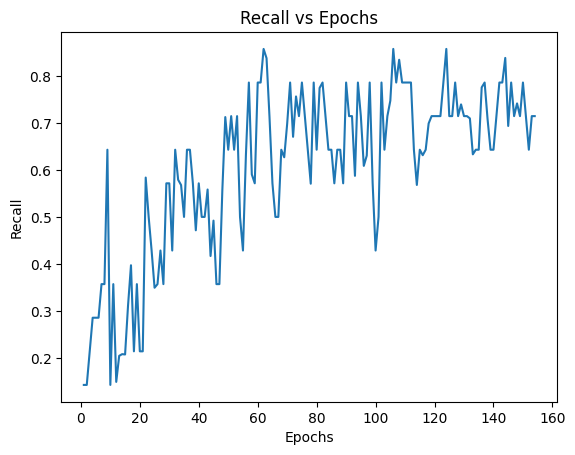

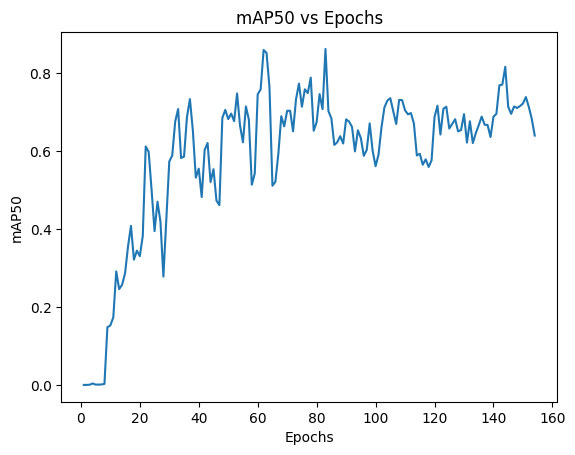

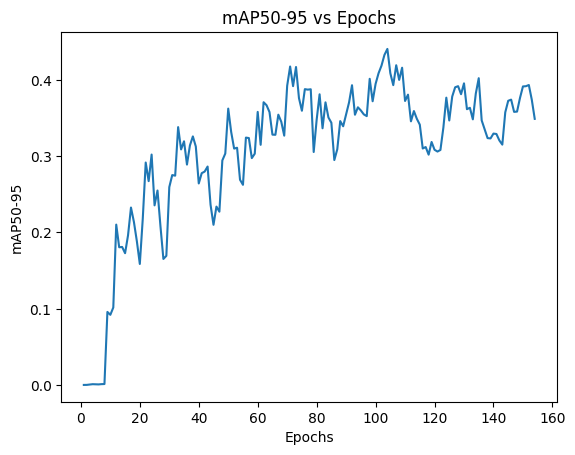

In [18]:
# Listas para almacenar los valores
epochs = []
train_bl = []
train_cl = []
train_dl = []
val_bl = []
val_cl = []
val_dl = []
precision = []
recall = []
mAP50 = []
mAP50_95 = []

# Leer el archivo línea por línea
with open('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/YOLOv8_Models/runs/yolov8n.pt/test/train/results.csv', 'r') as file:
    next(file)
    for line in file:
        # Dividir la línea en elementos usando comas como separadores
        elements = line.strip().split(',')

        # Agregar cada elemento a la lista correspondiente
        epochs.append(int(elements[0]))
        train_bl.append(float(elements[1]))
        train_cl.append(float(elements[2]))
        train_dl.append(float(elements[3]))
        precision.append(float(elements[4]))
        recall.append(float(elements[5]))
        mAP50.append(float(elements[6]))
        mAP50_95.append(float(elements[7]))
        val_bl.append(float(elements[8]))
        val_cl.append(float(elements[9]))
        val_dl.append(float(elements[10]))

# Grafica por epocas cada train vs valid del box loss, cls loss y dfl loss y guarda 

plt.plot(epochs, train_bl, label='train')
plt.plot(epochs, val_bl, label='validation')
plt.legend(fontsize=8)
plt.xlabel('Epochs')
plt.ylabel('Box Loss')
plt.title('Box Loss vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/box_loss_nano.png')
plt.show()

plt.plot(epochs, train_cl, label='train')
plt.plot(epochs, val_cl, label='validation')
plt.legend(fontsize=8)
plt.xlabel('Epochs')
plt.ylabel('Cls Loss')
plt.title('Cls Loss vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/cls_loss_nano.png')
plt.show()

plt.plot(epochs, train_dl, label='train')
plt.plot(epochs, val_dl, label='validation')
plt.legend(fontsize=8)
plt.xlabel('Epochs')
plt.ylabel('Dfl Loss')
plt.title('Dfl Loss vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/dfl_loss_nano.png')
plt.show()

plt.plot(epochs, precision)
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/p_nano.png')
plt.show()

plt.plot(epochs, recall)
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/r_nano.png')
plt.show()

plt.plot(epochs, mAP50)
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.title('mAP50 vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/m_nano.png')
plt.show()

plt.plot(epochs, mAP50_95)
plt.xlabel('Epochs')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/ma_nano.png')
plt.show()

### YOLO Small 

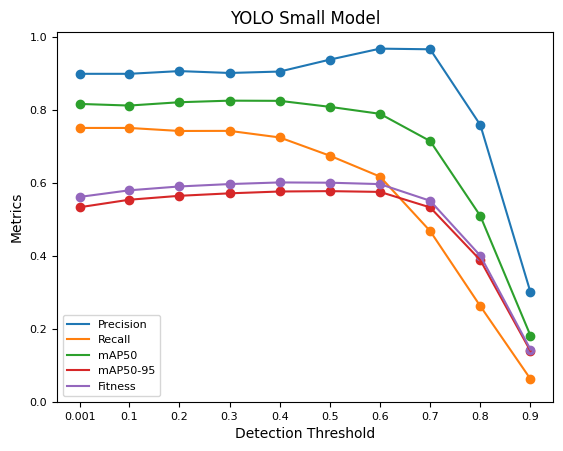

Max precision:  0.9675 ± 0.1996583650761403  en la fila:  6
Recall:  0.6168686868686868 ± 0.2411419068422631
mAP50:  0.7888768749999999 ± 0.20976889249213007
mAP50:  0.5749395882936508 ± 0.13922471400844746
Fitness:  0.5963333169642857 ± 0.14608383674977773


In [4]:
# Lee el archivo CSV
df = pd.read_csv('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/YOLOv8_Models/runs/yolov8s.pt/metrics.csv')

# Extrae las columnas relevantes
thresholds = df['threshold']
precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']
mAP50 = df['metrics/mAP50(B)']
mAP50_95 = df['metrics/mAP50-95(B)']
fitness = df['fitness']

# Grafica y guarda Threshold vs Precision
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, mAP50, label='mAP50')
plt.plot(thresholds, mAP50_95, label='mAP50-95')
plt.plot(thresholds, fitness, label='Fitness')

plt.legend(fontsize=8)

plt.scatter(thresholds, precision, label='Precision')
plt.scatter(thresholds, recall, label='Recall')
plt.scatter(thresholds, mAP50, label='mAP50')
plt.scatter(thresholds, mAP50_95, label='mAP50-95')
plt.scatter(thresholds, fitness, label='Fitness')

y_ticks = np.round(np.arange(0,1.1,0.2), 1)
x_ticks = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.yticks(y_ticks, labels=y_ticks, fontsize=8)
plt.xticks(x_ticks, labels=x_ticks, fontsize=8)
plt.xlabel('Detection Threshold')
plt.ylabel('Metrics')
plt.title('YOLO Small Model')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/metrics_small.png')
plt.show()

# Obtener Desviacion estandard
precision_std = df['metrics/precision(B)'].std()
recall_std = df['metrics/recall(B)'].std()
mAP50_std = df['metrics/mAP50(B)'].std()
mAP50_95_std = df['metrics/mAP50-95(B)'].std()
fitness_std = df['fitness'].std()

# Imprimir metricas
indice_p = precision == precision.max()
print('Max precision: ', precision.max(), '±', precision_std, ' en la fila: ', indice_p[indice_p == True].index[0])
print('Recall: ', recall[6], '±', recall_std)
print('mAP50: ', mAP50[6], '±', mAP50_std)
print('mAP50: ', mAP50_95[6], '±', mAP50_95_std)
print('Fitness: ', fitness[6], '±', fitness_std)

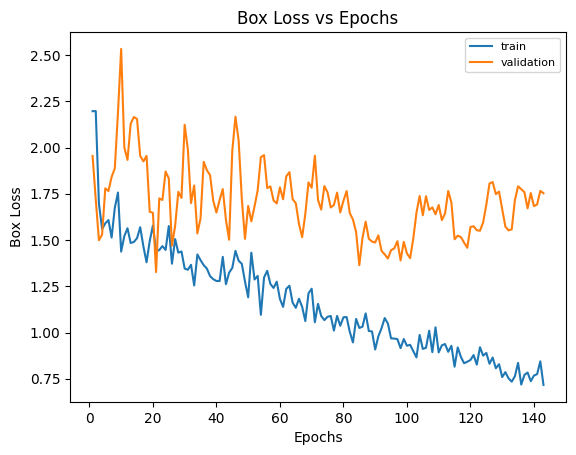

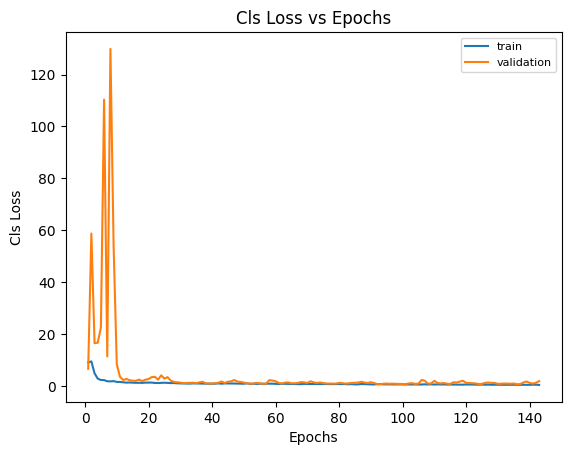

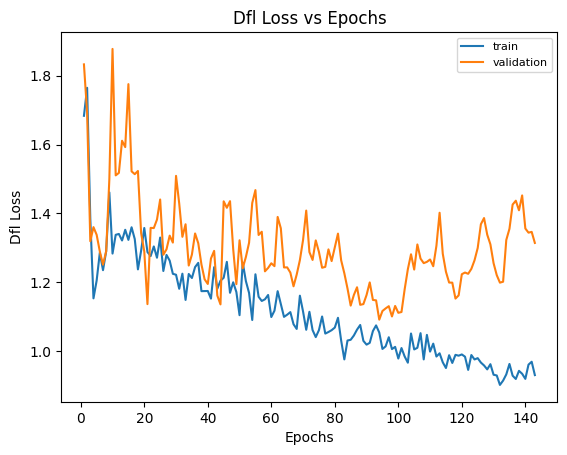

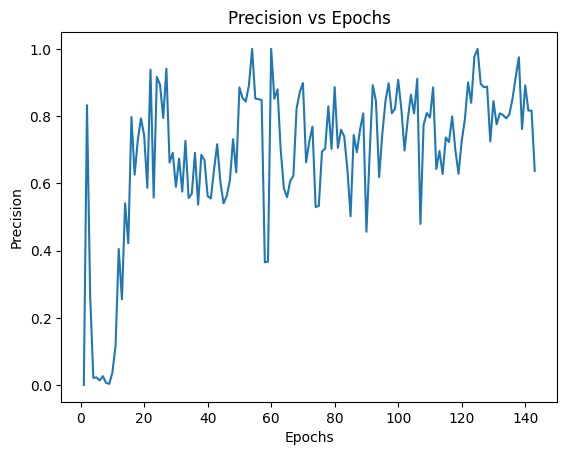

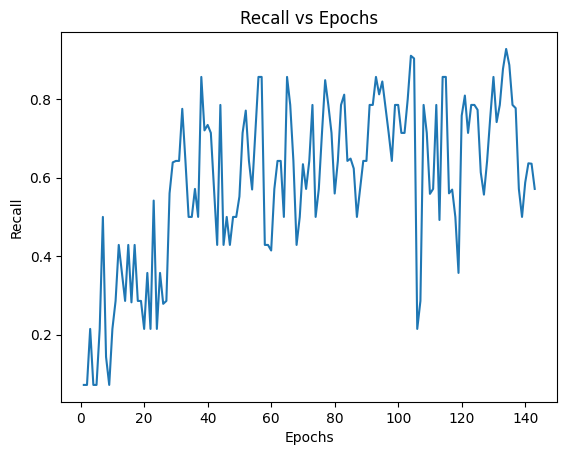

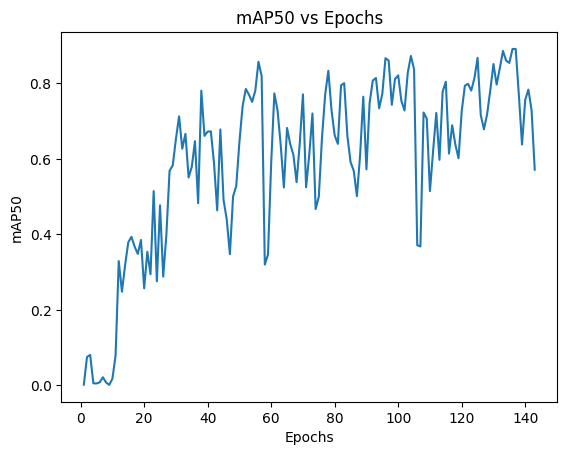

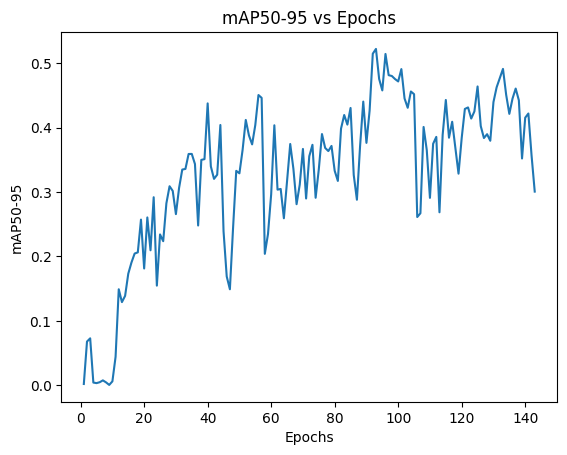

In [19]:
# Listas para almacenar los valores
epochs = []
train_bl = []
train_cl = []
train_dl = []
val_bl = []
val_cl = []
val_dl = []
precision = []
recall = []
mAP50 = []
mAP50_95 = []

# Leer el archivo línea por línea
with open('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/YOLOv8_Models/runs/yolov8s.pt/test/train/results.csv', 'r') as file:
    next(file)
    for line in file:
        # Dividir la línea en elementos usando comas como separadores
        elements = line.strip().split(',')

        # Agregar cada elemento a la lista correspondiente
        epochs.append(int(elements[0]))
        train_bl.append(float(elements[1]))
        train_cl.append(float(elements[2]))
        train_dl.append(float(elements[3]))
        precision.append(float(elements[4]))
        recall.append(float(elements[5]))
        mAP50.append(float(elements[6]))
        mAP50_95.append(float(elements[7]))
        val_bl.append(float(elements[8]))
        val_cl.append(float(elements[9]))
        val_dl.append(float(elements[10]))

# Grafica por epocas cada train vs valid del box loss, cls loss y dfl loss y guarda 

plt.plot(epochs, train_bl, label='train')
plt.plot(epochs, val_bl, label='validation')
plt.legend(fontsize=8)
plt.xlabel('Epochs')
plt.ylabel('Box Loss')
plt.title('Box Loss vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/box_loss_small.png')
plt.show()

plt.plot(epochs, train_cl, label='train')
plt.plot(epochs, val_cl, label='validation')
plt.legend(fontsize=8)
plt.xlabel('Epochs')
plt.ylabel('Cls Loss')
plt.title('Cls Loss vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/cls_loss_small.png')
plt.show()

plt.plot(epochs, train_dl, label='train')
plt.plot(epochs, val_dl, label='validation')
plt.legend(fontsize=8)
plt.xlabel('Epochs')
plt.ylabel('Dfl Loss')
plt.title('Dfl Loss vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/dfl_loss_small.png')
plt.show()

plt.plot(epochs, precision)
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/p_small.png')
plt.show()

plt.plot(epochs, recall)
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/r_small.png')
plt.show()

plt.plot(epochs, mAP50)
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.title('mAP50 vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/m_small.png')
plt.show()

plt.plot(epochs, mAP50_95)
plt.xlabel('Epochs')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 vs Epochs')
plt.savefig('C:/Users/DELL/Data_Mining/Data_Mining_Final_Proyect/Graphs/ma_small.png')
plt.show()